In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [12]:
haz_path = './natural_hazard_data/public_emdat.xlsx'
nat_haz_dat = pd.read_excel(haz_path)

In [13]:
pd.set_option('display.max_columns', None)
nat_haz_dat.head()

,DisNo.,Historic,Classification Key,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,External IDs,Event Name,ISO,Country,Subregion,Region,Location,Origin,Associated Types,OFDA Response,Appeal,Declaration,AID Contribution ('000 US$),Magnitude,Magnitude Scale,Latitude,Longitude,River Basin,Start Year,Start Month,Start Day,End Year,End Month,End Day,Total Deaths,No. Injured,No. Affected,No. Homeless,Total Affected,Reconstruction Costs ('000 US$),"Reconstruction Costs, Adjusted ('000 US$)",Insured Damage ('000 US$),"Insured Damage, Adjusted ('000 US$)",Total Damage ('000 US$),"Total Damage, Adjusted ('000 US$)",CPI,Admin Units,Entry Date,Last Update
0,1999-9388-DJI,No,nat-cli-dro-dro,Natural,Climatological,Drought,Drought,NaN,NaN,DJI,Djibouti,Sub-Saharan Africa,Africa,"Ali Sabieh, Dikhil, Djibouti, Obock, Tadjourah...",NaN,NaN,Yes,No,No,1556.0,NaN,Km2,NaN,NaN,NaN,2001,6.0,NaN,2001,NaN,NaN,NaN,NaN,100000.0,NaN,100000.0,NaN,NaN,NaN,NaN,NaN,NaN,60.503579,"[{""adm1_code"":1093,""adm1_name"":""Ali Sabieh""},{...",2006-03-01,2023-09-25
1,1999-9388-SDN,No,nat-cli-dro-dro,Natural,Climatological,Drought,Drought,NaN,NaN,SDN,Sudan,Northern Africa,Africa,"Northern Darfur, Northern Kordofan, Red Sea pr...",NaN,Food shortage|Water shortage,No,No,No,NaN,NaN,Km2,NaN,NaN,NaN,2000,1.0,NaN,2001,NaN,NaN,NaN,NaN,2000000.0,NaN,2000000.0,NaN,NaN,NaN,NaN,NaN,NaN,58.840648,"[{""adm1_code"":2757,""adm1_name"":""Northern Darfu...",2006-03-08,2023-09-25
2,1999-9388-SOM,No,nat-cli-dro-dro,Natural,Climatological,Drought,Drought,NaN,NaN,SOM,Somalia,Sub-Saharan Africa,Africa,"Ceel Barde, Rab Dhuure, Tayeeglow, Xudur distr...",NaN,Food shortage,No,No,No,NaN,NaN,Km2,NaN,NaN,NaN,2000,1.0,NaN,2001,NaN,NaN,21.0,NaN,1200000.0,NaN,1200000.0,NaN,NaN,NaN,NaN,NaN,NaN,58.840648,"[{""adm1_code"":2691,""adm1_name"":""Bay""},{""adm1_c...",2006-03-08,2023-09-25
3,2000-0002-AGO,No,nat-hyd-flo-riv,Natural,Hydrological,Flood,Riverine flood,NaN,NaN,AGO,Angola,Sub-Saharan Africa,Africa,"Dombre Grande village (Baia Farta district, Be...",Heavy rain,NaN,No,No,Yes,NaN,47000.0,Km2,NaN,NaN,"Coporolo, Kwanza, Lucala",2000,1.0,8.0,2000,1.0,15.0,31.0,NaN,70000.0,NaN,70000.0,NaN,NaN,NaN,NaN,10000.0,16995.0,58.840648,"[{""adm2_code"":4214,""adm2_name"":""Baia Farta""},{...",2005-02-03,2023-09-25
4,2000-0003-BGD,No,nat-met-ext-col,Natural,Meteorological,Extreme temperature,Cold wave,NaN,NaN,BGD,Bangladesh,Southern Asia,Asia,"Barisal, Chittagong, Dhaka, Khulna, Rajshahi, ...",NaN,NaN,No,No,No,NaN,6.4,°C,NaN,NaN,NaN,2000,1.0,NaN,2000,1.0,NaN,49.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58.840648,"[{""adm1_code"":575,""adm1_name"":""Barisal""},{""adm...",2003-07-01,2023-09-25


In [14]:
nat_haz_dat['Country'].unique()

array(['Djibouti', 'Sudan', 'Somalia', 'Angola', 'Bangladesh',
       'Guatemala', 'Iran (Islamic Republic of)', 'Mozambique',
       'South Africa', 'Brazil', 'India', 'United States of America',
       'Romania', 'Bulgaria', 'China', 'Réunion', 'Philippines',
       'Botswana', 'Mongolia', 'Russian Federation', 'Congo',
       'Afghanistan', 'Ethiopia', 'United Republic of Tanzania',
       'Lesotho', 'Kenya', 'Bosnia and Herzegovina', 'Iceland', 'Namibia',
       'Colombia', 'Indonesia', 'Zimbabwe', 'Egypt', 'Israel', 'Jordan',
       'Eswatini', 'Australia', 'Zambia', 'Madagascar', 'Nigeria',
       'Mexico', 'Argentina', 'Malawi', 'Pakistan',
       'Democratic Republic of the Congo', 'Peru',
       'Bolivia (Plurinational State of)', 'Chad', 'Austria', 'Niger',
       'Malaysia', 'Cameroon', 'Czechia', 'Japan',
       'Central African Republic', 'Benin', 'Türkiye', 'Hungary',
       'Republic of Korea', 'Serbia Montenegro', 'Ecuador',
       'Saudi Arabia', 'Honduras', 'French Gu

In [117]:
# create sub data set to only keep the relevant columnss
selected_columns = [
    'DisNo.', 'Classification Key', 'Disaster Subgroup', 'Disaster Type',
    'Disaster Subtype', 'Event Name', 'ISO', 'Country', 'Subregion', 'Region',
    'Location', 'Origin', 'Associated Types', 'Declaration', 'Magnitude',
    'Magnitude Scale', 'Start Year', 'Start Month', 'Start Day', 'End Year',
    'End Month', 'End Day', 'Total Deaths', 'No. Injured', 'No. Affected',
    'No. Homeless', 'Total Affected', """Reconstruction Costs, Adjusted ('000 US$)""",
    """Insured Damage, Adjusted ('000 US$)""", """Total Damage, Adjusted ('000 US$)"""
]
haz_dat = nat_haz_dat[selected_columns]

In [37]:
haz_dat.head()

,DisNo.,Classification Key,Disaster Subgroup,Disaster Type,Disaster Subtype,Event Name,ISO,Country,Subregion,Region,Location,Origin,Associated Types,Declaration,Magnitude,Magnitude Scale,Start Year,Start Month,Start Day,End Year,End Month,End Day,Total Deaths,No. Injured,No. Affected,No. Homeless,Total Affected,"Reconstruction Costs, Adjusted ('000 US$)","Insured Damage, Adjusted ('000 US$)","Total Damage, Adjusted ('000 US$)"
0,1999-9388-DJI,nat-cli-dro-dro,Climatological,Drought,Drought,NaN,DJI,Djibouti,Sub-Saharan Africa,Africa,"Ali Sabieh, Dikhil, Djibouti, Obock, Tadjourah...",NaN,NaN,No,NaN,Km2,2001,6.0,NaN,2001,NaN,NaN,NaN,NaN,100000.0,NaN,100000.0,NaN,NaN,NaN
1,1999-9388-SDN,nat-cli-dro-dro,Climatological,Drought,Drought,NaN,SDN,Sudan,Northern Africa,Africa,"Northern Darfur, Northern Kordofan, Red Sea pr...",NaN,Food shortage|Water shortage,No,NaN,Km2,2000,1.0,NaN,2001,NaN,NaN,NaN,NaN,2000000.0,NaN,2000000.0,NaN,NaN,NaN
2,1999-9388-SOM,nat-cli-dro-dro,Climatological,Drought,Drought,NaN,SOM,Somalia,Sub-Saharan Africa,Africa,"Ceel Barde, Rab Dhuure, Tayeeglow, Xudur distr...",NaN,Food shortage,No,NaN,Km2,2000,1.0,NaN,2001,NaN,NaN,21.0,NaN,1200000.0,NaN,1200000.0,NaN,NaN,NaN
3,2000-0002-AGO,nat-hyd-flo-riv,Hydrological,Flood,Riverine flood,NaN,AGO,Angola,Sub-Saharan Africa,Africa,"Dombre Grande village (Baia Farta district, Be...",Heavy rain,NaN,Yes,47000.0,Km2,2000,1.0,8.0,2000,1.0,15.0,31.0,NaN,70000.0,NaN,70000.0,NaN,NaN,16995.0
4,2000-0003-BGD,nat-met-ext-col,Meteorological,Extreme temperature,Cold wave,NaN,BGD,Bangladesh,Southern Asia,Asia,"Barisal, Chittagong, Dhaka, Khulna, Rajshahi, ...",NaN,NaN,No,6.4,°C,2000,1.0,NaN,2000,1.0,NaN,49.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [78]:
country = 'Nepal'

In [79]:
local_haz = haz_dat[haz_dat['Country'] == country]

In [50]:
local_haz

,DisNo.,Classification Key,Disaster Subgroup,Disaster Type,Disaster Subtype,Event Name,ISO,Country,Subregion,Region,Location,Origin,Associated Types,Declaration,Magnitude,Magnitude Scale,Start Year,Start Month,Start Day,End Year,End Month,End Day,Total Deaths,No. Injured,No. Affected,No. Homeless,Total Affected,"Reconstruction Costs, Adjusted ('000 US$)","Insured Damage, Adjusted ('000 US$)","Total Damage, Adjusted ('000 US$)"
702,2001-0386-DEU,nat-met-sto-lig,Meteorological,Storm,Lightning/Thunderstorms,Willy,DEU,Germany,Western Europe,Europe,Bayern province,NaN,NaN,No,100.0,Kph,2001,7.0,6.0,2001,7.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,330559.0,495838.0
1001,2002-0055-DEU,nat-met-sto-sto,Meteorological,Storm,Storm (General),Jennifer,DEU,Germany,Western Europe,Europe,"Bremen, Thueringen, Bayern, Hamburg, Mecklenbu...",NaN,Flood,No,NaN,Kph,2002,1.0,28.0,2002,1.0,29.0,4.0,6.0,NaN,NaN,6.0,NaN,162699.0,244049.0
1047,2002-0168-DEU,nat-bio-epi-vir,Biological,Epidemic,Viral disease,NaN,DEU,Germany,Western Europe,Europe,Coburg (Southern Bavaria),NaN,NaN,No,NaN,Vaccinated,2002,2.0,1.0,2002,2.0,1.0,NaN,NaN,600.0,NaN,600.0,NaN,NaN,NaN
1178,2002-0420-DEU,nat-met-sto-sto,Meteorological,Storm,Storm (General),NaN,DEU,Germany,Western Europe,Europe,Berlin province,NaN,NaN,No,150.0,Kph,2002,7.0,10.0,2002,7.0,10.0,7.0,13.0,NaN,NaN,13.0,NaN,NaN,162699.0
1203,2002-0467-DEU,nat-hyd-flo-flo,Hydrological,Flood,Flood (General),NaN,DEU,Germany,Western Europe,Europe,"Bayern, Baden-Wuerttemberg, Thueringen, Nieder...",NaN,Rain,Yes,NaN,Km2,2002,8.0,11.0,2002,8.0,20.0,27.0,108.0,330000.0,NaN,330108.0,NaN,2928582.0,18873085.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9138,2022-0112-DEU,nat-met-sto-ext,Meteorological,Storm,Extra-tropical storm,Storm 'Eunice' (Zeynep),DEU,Germany,Western Europe,Europe,NaN,NaN,NaN,No,NaN,Kph,2022,2.0,18.0,2022,2.0,18.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,1023156.0
9288,2022-0465-DEU,nat-met-ext-hea,Meteorological,Extreme temperature,Heat wave,NaN,DEU,Germany,Western Europe,Europe,NaN,NaN,NaN,No,40.3,°C,2022,5.0,30.0,2022,9.0,4.0,8173.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9713,2023-0466-DEU,nat-met-sto-sev,Meteorological,Storm,Severe weather,NaN,DEU,Germany,Western Europe,Europe,NaN,NaN,NaN,No,NaN,Kph,2023,7.0,21.0,2023,7.0,25.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9787,2023-0724-DEU,nat-met-sto-ext,Meteorological,Storm,Extra-tropical storm,Storm 'Ciaran',DEU,Germany,Western Europe,Europe,NaN,NaN,NaN,No,NaN,Kph,2023,11.0,1.0,2023,11.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
local_haz.dtypes

DisNo.                                        object
Classification Key                            object
Disaster Subgroup                             object
Disaster Type                                 object
Disaster Subtype                              object
Event Name                                    object
ISO                                           object
Country                                       object
Subregion                                     object
Region                                        object
Location                                      object
Origin                                        object
Associated Types                              object
Declaration                                   object
Magnitude                                    float64
Magnitude Scale                               object
Start Year                                     int64
Start Month                                  float64
Start Day                                    f

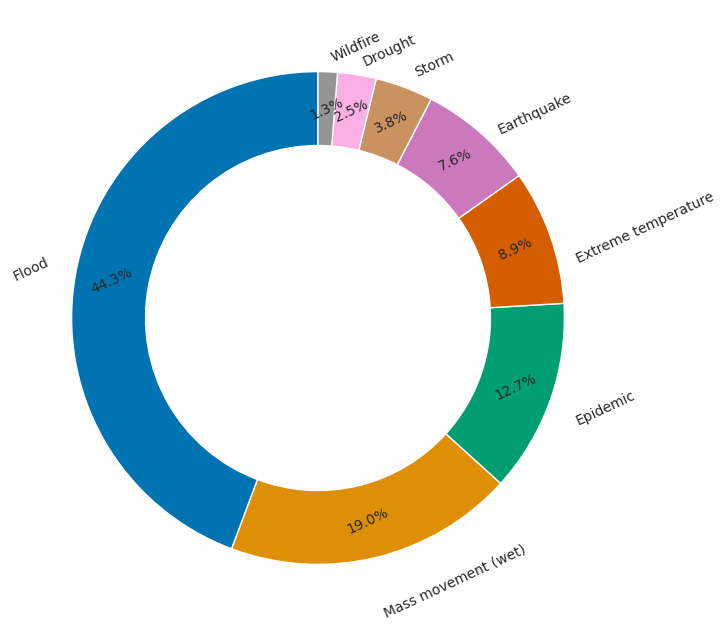

In [116]:
# Filter out rows with NaN values
local_haz_woNan = local_haz.dropna(subset=['Disaster Type'])

# Color-blind friendly color palette
#colors = ['#1f78b4', '#33a02c', '#e31a1c', '#ff7f00', '#6a3d9a', '#a6cee3', '#b2df8a']
colors = sns.color_palette('colorblind')
sns.set(style='whitegrid')

# Count occurrences of each disaster type
disaster_counts = local_haz_woNan['Disaster Type'].value_counts()

# get time span
min = str(local_haz_woNan['Start Year'].min())
max = str(local_haz['End Year'].max())

# Plot for Disaster Type
plt.figure(figsize=(8, 8))
plt.pie(disaster_counts, labels=disaster_counts.index, autopct='%1.1f%%', colors=colors, startangle=90, pctdistance=0.85, wedgeprops=dict(width=0.3), textprops=dict(rotation=25, va='center', fontsize=10))
#plt.title('Distribution of disaster types in ' + country + ' between ' + min + ' and ' + max)
plt.show()

In [3]:
haz_path = './natural_hazard_data/public_emdat.xlsx'
nat_haz_dat = pd.read_excel(haz_path)

In [21]:
def natural_hazard_data(country):
# create sub data set to only keep the relevant columnss
    selected_columns = [
        'DisNo.', 'Classification Key', 'Disaster Subgroup', 'Disaster Type',
        'Disaster Subtype', 'Event Name', 'ISO', 'Country', 'Subregion', 'Region',
        'Location', 'Origin', 'Associated Types', 'Declaration', 'Magnitude',
        'Magnitude Scale', 'Start Year', 'Start Month', 'Start Day', 'End Year',
        'End Month', 'End Day', 'Total Deaths', 'No. Injured', 'No. Affected',
        'No. Homeless', 'Total Affected', """Reconstruction Costs, Adjusted ('000 US$)""",
        """Insured Damage, Adjusted ('000 US$)""", """Total Damage, Adjusted ('000 US$)"""
    ]
    haz_dat = nat_haz_dat[selected_columns]

    unique_locs = haz_dat['Country'].unique()
    my_loc = country

    # check if data is available for the country that we are currently investigating
    if my_loc in unique_locs:
        local_haz = haz_dat[haz_dat['Country'] == country]

        # Filter out rows with NaN values
        local_haz_woNan = local_haz.dropna(subset=['Disaster Type'])

        # Color-blind friendly color palette
        colors = sns.color_palette('colorblind')
        sns.set(style='whitegrid')

        # Count occurrences of each disaster type
        disaster_counts = local_haz_woNan['Disaster Type'].value_counts()

        # get time span
        min = str(local_haz_woNan['Start Year'].min())
        max = str(local_haz['End Year'].max())

        # Plot for Disaster Type
        fig = plt.subplots(figsize=(8,8))

        #plt.figure(figsize=(8, 8))
        plt.pie(disaster_counts, labels=disaster_counts.index, autopct='%1.1f%%', colors=colors, startangle=90, pctdistance=0.85, wedgeprops=dict(width=0.3), textprops=dict(rotation=25, va='center', fontsize=10))
        plt.title('Distribution of disaster types in ' + country + ' between ' + min + ' and ' + max)

######################## save plot into fig so it can be returned!
        return local_haz, fig 

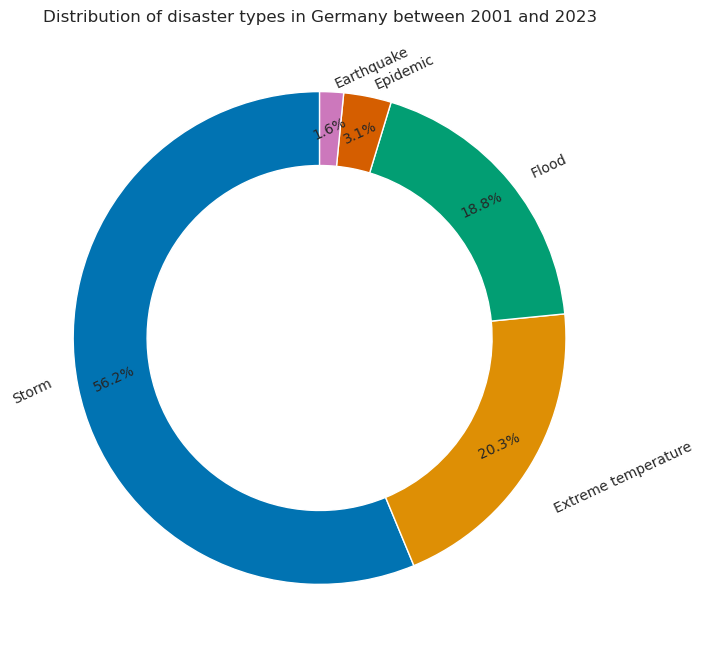

In [22]:
data, figure = natural_hazard_data("Germany")

In [9]:
data

NameError: name 'data' is not defined

TRUE


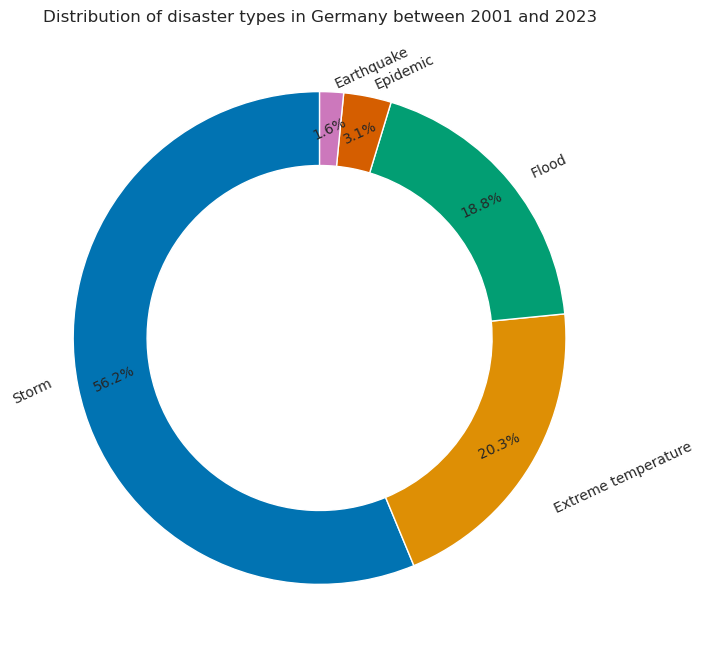

In [20]:
country = "Germany"
selected_columns = [
    'DisNo.', 'Classification Key', 'Disaster Subgroup', 'Disaster Type',
    'Disaster Subtype', 'Event Name', 'ISO', 'Country', 'Subregion', 'Region',
    'Location', 'Origin', 'Associated Types', 'Declaration', 'Magnitude',
    'Magnitude Scale', 'Start Year', 'Start Month', 'Start Day', 'End Year',
    'End Month', 'End Day', 'Total Deaths', 'No. Injured', 'No. Affected',
    'No. Homeless', 'Total Affected', """Reconstruction Costs, Adjusted ('000 US$)""",
    """Insured Damage, Adjusted ('000 US$)""", """Total Damage, Adjusted ('000 US$)"""
]
haz_dat = nat_haz_dat[selected_columns]

unique_locs = haz_dat['Country'].unique()
my_loc = country
# check if data is available for the country that we are currently investigating
if my_loc in unique_locs:
    print("TRUE")
    local_haz = haz_dat[haz_dat['Country'] == country]

    # Filter out rows with NaN values
    local_haz_woNan = local_haz.dropna(subset=['Disaster Type'])

    # Color-blind friendly color palette
    colors = sns.color_palette('colorblind')
    sns.set(style='whitegrid')

    # Count occurrences of each disaster type
    disaster_counts = local_haz_woNan['Disaster Type'].value_counts()

    # get time span
    min = str(local_haz_woNan['Start Year'].min())
    max = str(local_haz['End Year'].max())

    # Plot for Disaster Type
    fig = plt.subplots(figsize=(8,8))

    #plt.figure(figsize=(8, 8))
    plt.pie(disaster_counts, labels=disaster_counts.index, autopct='%1.1f%%', colors=colors, startangle=90, pctdistance=0.85, wedgeprops=dict(width=0.3), textprops=dict(rotation=25, va='center', fontsize=10))
    plt.title('Distribution of disaster types in ' + country + ' between ' + min + ' and ' + max)
    plt.show()


In [17]:
my_loc

'Germany'

In [19]:
unique_locs

array(['Ali Sabieh, Dikhil, Djibouti, Obock, Tadjourah provinces',
       'Northern Darfur, Northern Kordofan, Red Sea provinces',
       'Ceel Barde, Rab Dhuure, Tayeeglow, Xudur districts (Bakool province), Garbahaarey, Baardheere districts (Gedo province), Bay, Hiraan provinces ',
       ...,
       'Lampung, Jawa Barat, Jawa Tengah, Daerah Istimewa Yogyakarta, Jawa Timur, Banten, Bali, Nusatenggara Barat, Nusatenggara Timur, Kalimantan Barat, Kalimantan Selatan, Sulawesi Selatan, Sulawesi Tenggara, Sulawesi Barat, Maluku, Papua, Papua Barat',
       'Amazonas state',
       'Cochabamba, Chuquisaca, La Paz, Oruro, Santa Cruz'], dtype=object)